<a href="https://colab.research.google.com/github/yotam-biu/tutorial8/blob/main/data_processing_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependency

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the data and get a glimpse on it

#### Penguins data

## 1.  
Read the CSV file from the following link into a DataFrame:  
   [Palmer Penguins CSV](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv)  
   
Use the `pandas` library's `read_csv` function to load the data.  

Inspect the first few rows of the DataFrame to understand its structure and content.  

**Hint:** Remember to pass the URL directly to the function.


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")

In [3]:
data.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Retrieving data
Retrieving data in data science typically refers to the process of accessing and extracting specific subsets of data from a dataset. This operation is crucial for analyzing and working with data effectively. In this context, retrieving data can involve operations such as filtering rows, selecting columns, sorting, grouping, and aggregating data.


## 2. Filter

Filter the DataFrame to include only rows where the value in the `sex` column is "female".  

Assign the filtered DataFrame to a new variable named `data_female`.  

**Hint:** Use the syntax `data[condition]` to filter rows based on a condition.  


In [4]:
data_female = data[data['sex'] == 'female']

## Cleaning the data

Cleaning data is an essential step in the data science process. It involves identifying and handling missing values, handling duplicates, addressing inconsistencies or errors in the data, and transforming the data into a consistent and usable format.

## 3. Remove None

Use the `dropna()` method of the data-frame object to remove all rows with missing values from the DataFrame.  
Before applying the method, check the number of rows in the DataFrame using `len(data)` to understand the size of the data.  
Apply `dropna()` and assign the result back to the `data` variable.  
After applying the method, check the number of rows again using `len(data)` to confirm how many rows were removed.  


In [5]:
print("before", len(data))
data = data.dropna()
print("after", len(data))

before 344
after 333



## 4. Remove Duplicate
Use the `drop_duplicates()` method of the data-frame object to remove duplicate rows from the DataFrame.  
Before applying the method, check the number of rows in the DataFrame using `len(data)` to see the current size of the data.  
Then, Apply `drop_duplicates()` and assign the result back to the `data` variable.  
After applying the method, check the number of rows again using `len(data)` to see how many duplicate rows were removed.  


In [ ]:
print("before", len(data))
data = data.drop_duplicates()
print("after", len(data))

before 333
after 333


## 5. Filter By Z-Score
Calculate the z-scores for the `body_mass_g` column to identify how far each value deviates from the column's mean in terms of standard deviations.  

Use the formula for z-score:  
$$
   z = \frac{{\text{{value}} - \text{{mean}}}}{{\text{{standard deviation}}}}
$$  

Create a threshold of 2.5 to determine which values are considered outliers (i.e., values with a z-score greater than 2.5).  

Check the `body_mass_g` values of the outliers to understand their magnitudes.


Filter the DataFrame to include only the rows where the `body_mass_g` z-score exceeds the threshold.  

Again, cheak the number of rows before and after the filter.

**Hint:** Use `np.abs()` to ensure all z-scores are positive, and apply a condition to filter rows from the DataFrame.


In [8]:
print("before", len(data))
z_scores = np.abs((data['body_mass_g'] - data['body_mass_g'].mean()) / data['body_mass_g'].std())
threshold = 2.5
data[z_scores > threshold]

before 333


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
169,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,male,2007


In [9]:
print("before", len(data))
data = data[z_scores <= threshold]
print("after", len(data))

before 333
after 332


## EDA

Exploratory Data Analysis (EDA) is a critical step in the data science process. It involves understanding and analyzing the data to uncover patterns, relationships, and insights. EDA helps in formulating hypotheses, identifying data quality issues, selecting appropriate modeling techniques, and preparing the data for further analysis.

In [10]:
data['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

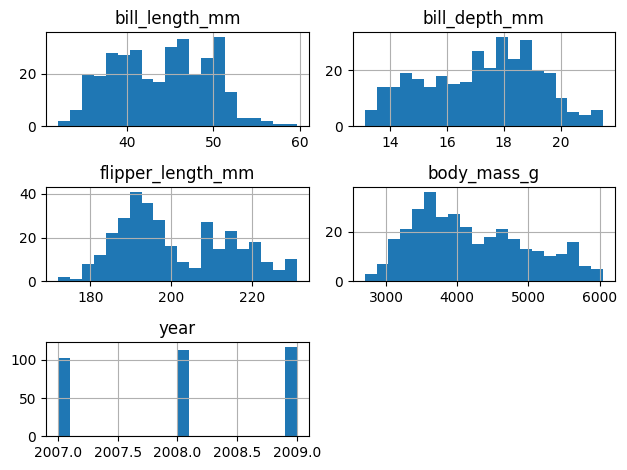

In [11]:
data.hist(bins=20);
plt.tight_layout();

In [ ]:
data.describe()

group by method

In [22]:
data.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384,2008.054795
Chinstrap,48.833824,18.420588,195.823529,3733.088235,2007.970588
Gentoo,47.554237,14.994915,217.203390,5082.203390,2008.076271


In [24]:
data.groupby('species')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']].agg(['mean', 'median'])

bill_length_mm        bill_depth_mm        flipper_length_mm         \
                    mean median          mean median              mean median   
species                                                                         
Adelie         38.823973  38.85     18.347260  18.40        190.102740  190.0   
Chinstrap      48.833824  49.55     18.420588  18.45        195.823529  196.0   
Gentoo         47.554237  47.35     14.994915  15.00        217.203390  216.0   

           body_mass_g                 year          
                  mean  median         mean  median  
species                                              
Adelie     3706.164384  3700.0  2008.054795  2008.0  
Chinstrap  3733.088235  3700.0  2007.970588  2008.0  
Gentoo     5082.203390  5050.0  2008.076271  2008.0

## 6.

* Import the necessary libraries: `matplotlib.pyplot` or `seaborn`.  

* Assume you have a DataFrame named `data` that contains a column named `species` and another numerical column, `flipper_length_mm`.  

* Group the data by the `species` column using the `groupby()` method.  

* For each species, create a histogram of the `flipper_length_mm` column. Use a different color for each species and set the `alpha` parameter to make the bars semi-transparent.  

* Add appropriate labels (`xlabel`, `ylabel`) and a title to the plot to describe the data.  

* Include a legend to identify the species represented by each histogram.  

* Display the histogram using `plt.show()`.  

**Hint:** Use a loop to iterate through each group returned by `groupby()`. The loop will provide the species name and the data subset for that species.


In [25]:
grouped = data.groupby('species')
for species, species_data in grouped:
    print(species, len(species_data))

Adelie 146
Chinstrap 68
Gentoo 118


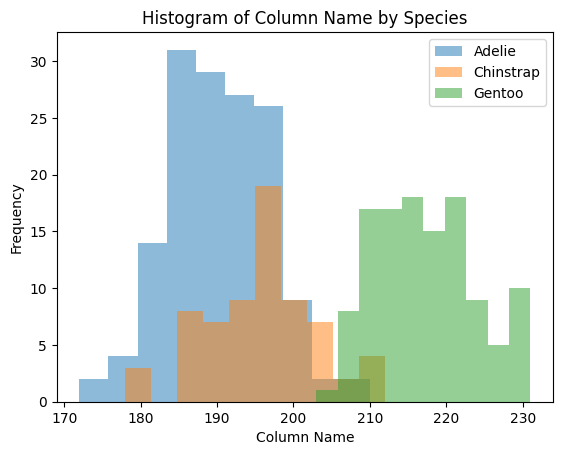

In [26]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'species' and 'column_name'

# Group the data by species
grouped = data.groupby('species')

# Plot a histogram for each species with different colors
for species, species_data in grouped:
    plt.hist(species_data['flipper_length_mm'], label=species, alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Column Name')
plt.ylabel('Frequency')
plt.title('Histogram of Column Name by Species')
plt.legend()

# Display the plot
plt.show()


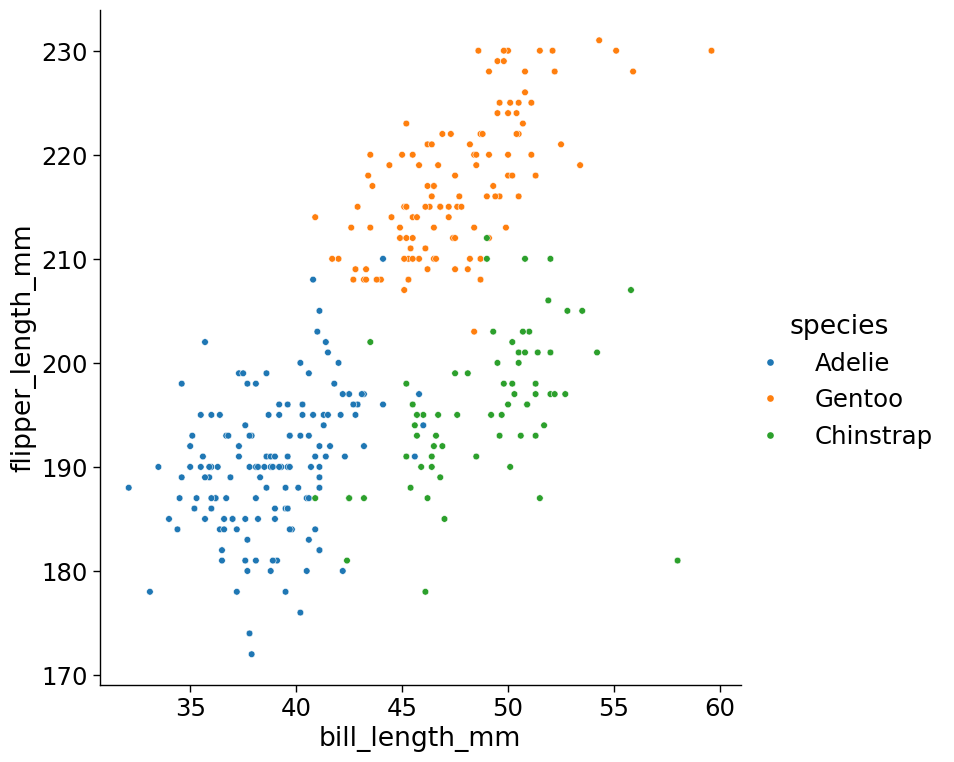

In [27]:

import seaborn as sns

sns.set_context("paper", font_scale=2)
sns.relplot(
    data = data,
    x = 'bill_length_mm',
    y = 'flipper_length_mm',
    hue = 'species',
    height=8,
    hue_order = ['Adelie', 'Gentoo', 'Chinstrap']);

## 7.

* Explore the relationship between different columns in the `data` DataFrame by creating your own scatter plot using `sns.relplot()`.  

* Choose different columns for the `x` and `y` axes to visualize a new aspect of the dataset.  

* Use the `hue` parameter to color the points by a categorical column, such as `species` or another relevant column.  

* Customize the plot by setting attributes like `height` or `hue_order` as needed.  

* Experiment with the `style` or `size` parameters in `sns.relplot()` to add more dimensions to your plot.  

* Display your plot and ensure it is clear and well-labeled.  

**Hint:** Refer to the provided example for guidance on using `sns.relplot()`. Consider exploring combinations of columns like `body_mass_g` and `bill_depth_mm`.


Go Over the Following Plots

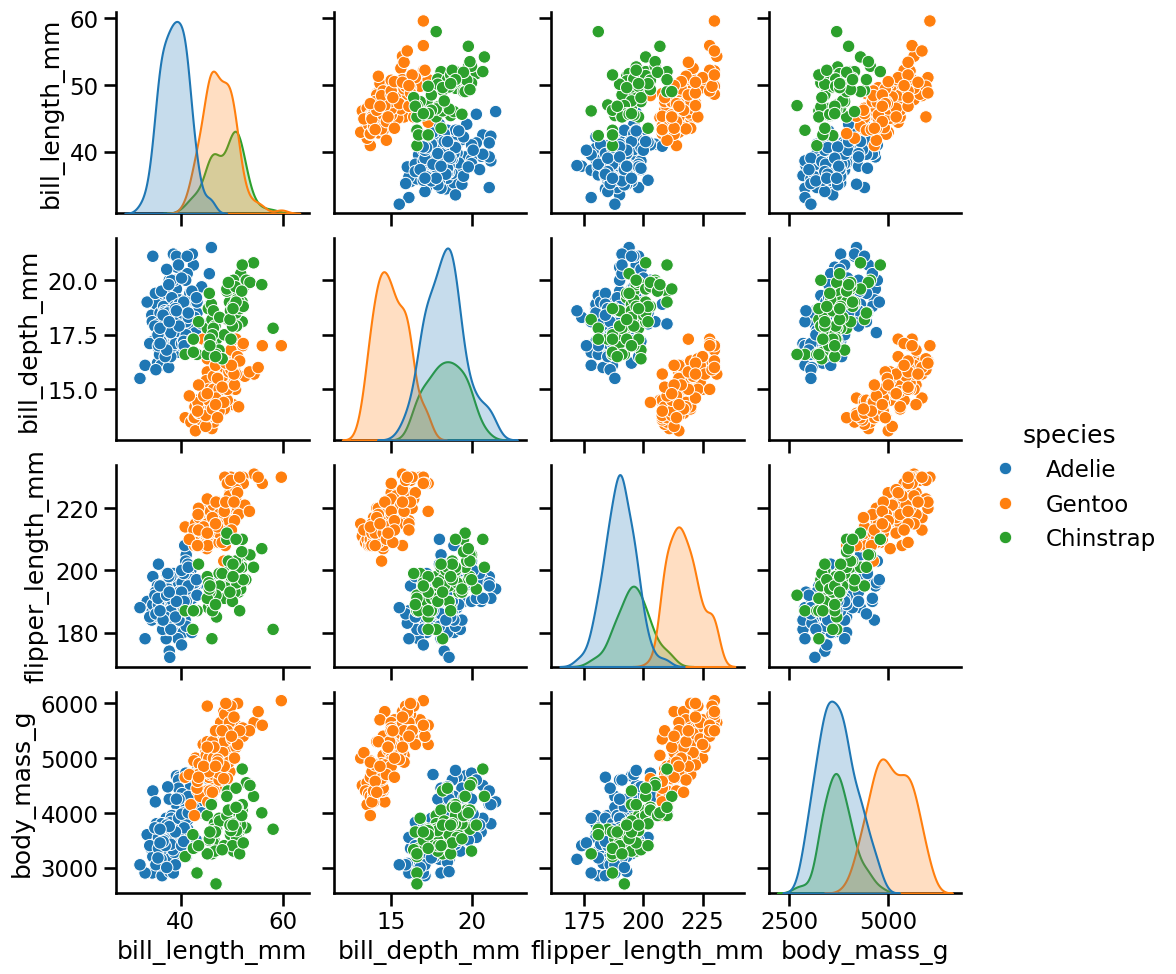

In [28]:
sns.set_context('talk')
sns.pairplot(data.drop(columns = ['year']), hue='species');

<Axes: xlabel='species', ylabel='flipper_length_mm'>

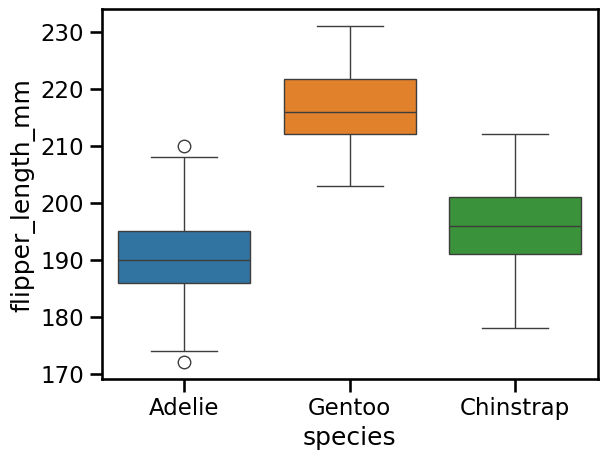

In [29]:
sns.boxplot(data=data, hue = 'species', x='species', y='flipper_length_mm')

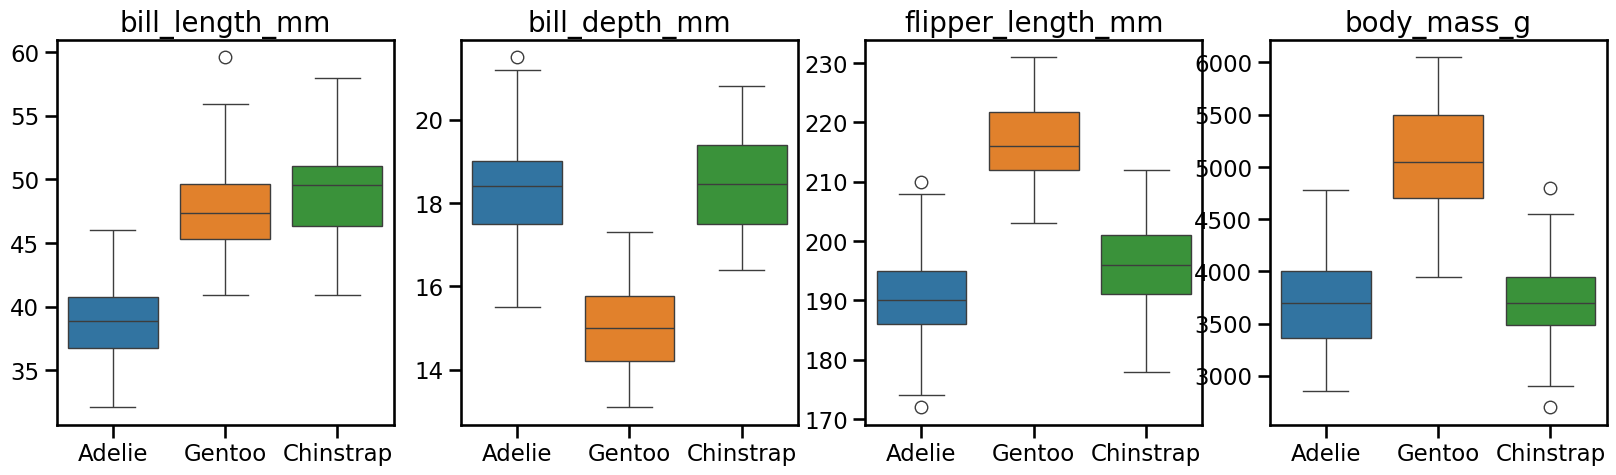

In [30]:
columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, axs = plt.subplots(1, len(columns), figsize=(20,5))

for i, col in enumerate(columns):
    sns.boxplot(data=data, x='species', y=col, hue='species', ax = axs[i])
    axs[i].legend([], [], frameon=False)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)
    axs[i].set_title(col, fontsize = 20)

After performing Exploratory Data Analysis (EDA), there are several subsequent stages in the data science process. Here's a brief summary of some common stages that typically follow EDA:

* **Feature Engineering**: This stage involves transforming and creating new features from the existing data to improve the performance of machine learning models. Feature engineering can include techniques such as scaling, normalization, one-hot encoding, handling missing values, creating interaction terms, and deriving new features based on domain knowledge.

* **Model Selection**: In this stage, various machine learning algorithms or models are evaluated and compared to select the most suitable one for the given problem. The choice of the model depends on the nature of the data, the target variable, the available computational resources, and the desired performance metrics.

* **Model Training and Evaluation**: Once the model is selected, it needs to be trained on the labeled data (training set). This involves fitting the model to the data, adjusting its parameters to optimize performance. The trained model is then evaluated using appropriate metrics such as accuracy, precision, recall, F1-score, or area under the ROC curve.

* **Hyperparameter Tuning**: Many machine learning algorithms have hyperparameters that control the model's behavior and performance. Hyperparameter tuning involves selecting the optimal combination of hyperparameters to improve the model's performance. Techniques like grid search, random search, or Bayesian optimization can be used for this purpose.

* **Model Validation and Testing**: After training and tuning the model, it needs to be validated and tested on unseen data to assess its generalization capabilities. The model is evaluated using a separate validation set or through cross-validation techniques. The final model's performance is assessed on a completely independent test set to estimate its real-world performance.

* **Model Deployment**: Once the model is trained, validated, and tested, it can be deployed for real-world use. This involves integrating the model into a production environment, making predictions on new data, and monitoring its performance over time. Deployment may involve the use of frameworks, APIs, or cloud services to enable model serving and inference.

* **Monitoring and Maintenance**: After deployment, it's important to monitor the model's performance and behavior in production. Regular maintenance and retraining may be necessary to keep the model up to date and ensure its continued accuracy and reliability.

These stages are not necessarily linear and may involve iterations and feedback loops. The exact sequence and scope of these stages may vary depending on the specific problem, data, and requirements of the project.